# Spatial Data Visualization
---

### Introduction

🌇In this lab, you'll learn how to visualize various types of data.

What you'll learn from this lab:
- The fundamentals of data visualization principles and tools.
- Techniques for mapping spatial, temporal, and demographic urban data.

> **I believe that visualization is one of the most powerful means of achieving personal goals**.
>
> — Harvey Mackay


🔔 Question: A quick question to help you understand better.

🥊 Challenge: Interactive exercise. We'll work through these in the lab!

💡 Tip: How to do something a bit more efficiently or effectively.

📖 Documentation: Links to official documentation or additional reading materials to deepen your understanding.


## 1. Getting Started

🔔 Question: Can you list some data types that you have seen before?

📖 Documentation:

[Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations](https://matplotlib.org/)

[Seaborn: statistical data visualization](https://seaborn.pydata.org/index.html#)


Now we will be using many libraries in this notebook. Some of which you are probably farmiliar with by now. Some might be new to you. If you have install all libraries below in your environment and prefer to import all of them in one go, please run the cell below. If you are running this notebook for the first time and would like to take things slow and import libraries one at a time, please skip the cell below!

In [ ]:
# import all libraries!
import os # provide functions to interact with the operating system(eg. manage files and directories)
import requests # make HTTP requests (like fetching data from websites)

import pandas as pd # for fundamental for data manipulation and analysis
import numpy as np # for numerical operations
import geopandas as gpd # extends pandas to work with geospatial data

import matplotlib as mpl # creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

import plotly.express as px # creating interactive visualizations
import seaborn as sns # Seaborn builds on matplotlib to create more statistically informative and visually appealing plots

from eomaps import Maps # creating and customizing interactive maps with geographical data

import earthpy as et # for geospatial data access, manipulation, and analysis
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio # ead and write geospatial raster data formats

import folium # creating interactive maps that can be displayed in web browsers

from datetime import datetime
from meteostat import Point, Daily # access historical weather data

# Prophet library is a time series forecasting tool developed by Meta
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import pydeck as pdk # for creating 3D and geospatial visualizations

#### Data Types and Formats

Tabular Data: CSV, Excel (e.g., Census, GTFS).

Spatial Data: GeoJSON, Shapefiles, WKT (e.g., City boundaries).

Time-Series Data: CSV, JSON, or database tables with timestamp columns(e.g., ERA5).

API Data: JSON responses (e.g., Yelp APIs, Google Maps APIs).

Static Visualizations: Bar charts, line plots, scatter plots, and histograms using Matplotlib or Seaborn.

<img src="https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png" width="1000">

💡 Tip: Color palette choices

Broadly, palettes fall into one of three categories:

- Qualitative palettes, good for representing categorical data

- Sequential palettes, good for representing numeric data

- Diverging palettes, good for representing numeric data with a categorical boundary

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*HYezsn7KKZssUoPc.png" width="600">


Confused about how to choose color palattes? Check out more info in this link: https://seaborn.pydata.org/tutorial/color_palettes.html

💡 Quick Tip: Accessible palettes for color blindness

1. Avoid red, especially with green

2. Use pre-existing colorblind safe palettes

3. Avoid rainbows color maps

It is important to make sure your graphs and maps are readable by color blind readers. Some journals, like Nature, also strongly encourage having color blind safe figures. Netherlands Cancer Institute provides a nice guide on creating color blind friendly figures. Please check it out here [Guidelines color blind friendly figures
 ](https://www.nki.nl/about-us/responsible-research/guidelines-color-blind-friendly-figures/).
 
 Additionally, I highly recommend Paul Tol's notes on colour schemes in which he also included a section dedicated to color blindness. Here is a link to his notes: [Paul Tol's notes on color schemes and templates](https://personal.sron.nl/~pault/)



In [23]:
from IPython.display import Image, IFrame
IFrame("https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40", 900,500)

Without further ado, let's get started with making visuals!

#### Bar plot

🔔 Question: What are the differences between a bar chart and a histogram?

<img src="https://cdn.prod.website-files.com/621e95f9ac30687a56e4297e/64adca5e00190e5600663e82_V2_1681695077683_c21ca738-a949-4f27-aafa-35e662ddb9cf_HIGH_RES.png" width="800">

🔧 Matplotlib Installation: [Getting Started with Matplotlib in Python](https://matplotlib.org/stable/install/index.html)

In [14]:
import matplotlib.pyplot as plt

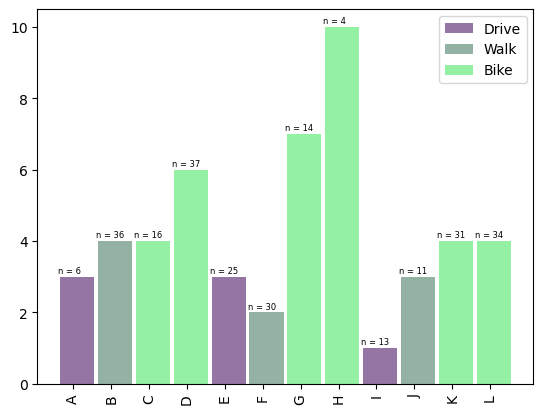

In [2]:
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Drive')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Walk')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='Bike')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

📖 Documentation: [Mastering the Bar Plot in Python Notebook](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Mastering_the_Bar_Plot_in_Python.ipynb#scrollTo=LHLH7pa7kK_3)

📖 Documentation: [Matplotlib - Bar Stacked](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)

🥊 Challenge: Visualizing Population by each Contient with an Interactive Bar Chart

🔧 Plotly Installation: [Getting Started with Plotly in Python](https://plotly.com/python/getting-started/)

In [3]:
import plotly.express as px
# Note: plotly express requires pandas to be installed.
# If you run into the error "Mime type rendering requires nbformat>=4.2.0 but it is not installed", try "pip install --upgrade nbformat" and then restart your kernel

In [4]:
# Using a sample dataset from Plotly
# Load and filter data
# px.data.gapminder(): loads a built-in "gapminder" dataset, containing countries' information over time
# .query("year == 2007") filters this dataset to include only data from the year 2007.
df = px.data.gapminder().query("year == 2007")

# Create the bar chart
fig = px.bar(df,
             x='continent', # Set x-axis to represent the 'continent' column
             y='pop', # Set y-axis to represent the 'pop' (population) column
             color='continent', # colors the bars based on the 'continent' column
             hover_name='country', # display name of the country when hovering
             title='Population by Continent in 2007')

fig.show()

# to save the fig, uncomment the line below:
# plt.savefig('population_by_continent.png')

📖 Hoping to learn more about making bar plots? Check out this tutorial by DataCamp: [Bar Plot Tutorial](https://www.datacamp.com/tutorial/python-bar-plot)

#### Line plot


🥊 Challenge: Visualizing Penguins' Bill Info with Line Charts 🐧

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500">

🔧 Seaborn Installation: [Getting Started with Seaborn in Python](https://seaborn.pydata.org/installing.html)

In [6]:
import seaborn as sns

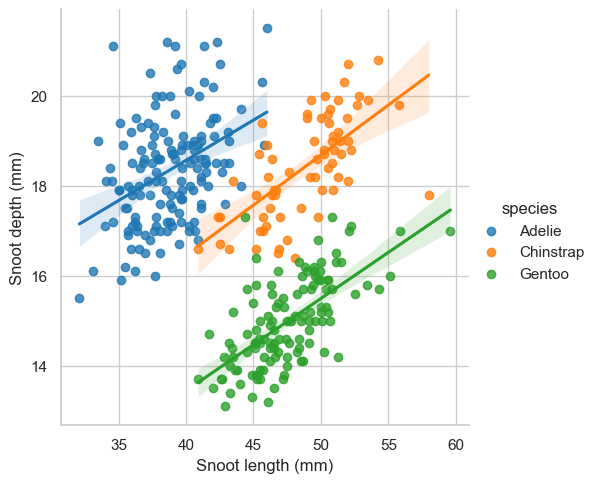

In [7]:
# Set the plot context and style
sns.set_style("whitegrid")
sns.set_context("notebook", # display plots in a Jupyter notebook
                rc={"lines.linewidth": 1.5} # make lines in the plot a bit thicker
                )

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create the plot
# sns.lm() plot data and regression model
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", # set bill length as x-axis
    y="bill_depth_mm", # set bill depth as y-axis
    hue="species", # colors the points based on the penguin species
    height=5 # control the height of the plot
)

# customize the x and y-axis labels
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")



📖 Documentation: [Seaborn - Multiple Regression](https://seaborn.pydata.org/examples/multiple_regression.html#)

📖 Documentation: [Seaborn - Set Theme Examples](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

📖 Documentation: [Seaborn - Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

📖 Documentation: [Seaborn - Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### Scatter plot

🥊 Challenge: Plotting Bills and Tips 💸 with Scatter Plots

[Text(0.5, 20.049999999999997, 'Penguins Body Mass(g)')]

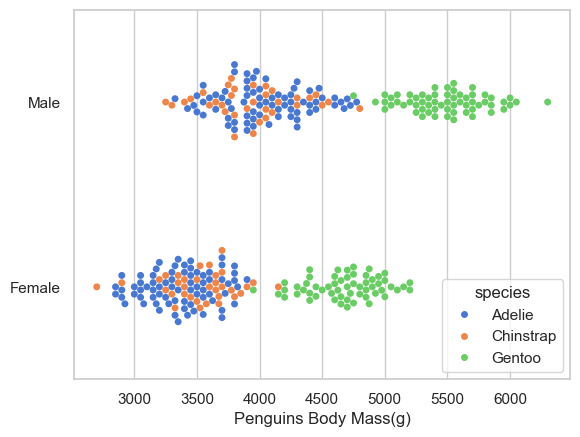

In [8]:
# import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df,
                   x="body_mass_g",
                   y="sex",
                   hue="species")


# set ylabel to an empty string, hiding the y-axis label, for better layout
# try to comment it and see comparison!
ax.set(ylabel="")

# rename xlabel from "body_mass_g"
ax.set(xlabel="Penguins Body Mass(g)")


🥊 Challenge: 🚛 Visualizing the Relationship Between Cars' Horsepower, Fuel Efficiency (mpg), and Acceleration 🏎 🚗

💡 Tip: The MPG Dataset

The MPG dataset contains information about miles per gallon for different car models and their attributes.

It includes features such as miles per gallon, number of cylinders in the engine, engine displacement, engine horsepower, vehicle weight, acceleration, model year, origin of the car, and car model name.



In [9]:
# set plot theme
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


`mpg`: Miles per gallon (numerical)

`cylinders`: Number of cylinders in the engine (numerical)

`displacement`: Engine displacement in cubic inches (numerical)

`horsepower`: Engine horsepower (numerical)

`weight`: Vehicle weight in pounds (numerical)

`acceleration`: Acceleration in seconds from 0 to 60 mph (numerical)

`model_year`: Model year (categorical)

`origin`: Origin of the car (1 = American, 2 = European, 3 = Japanese) (categorical)

`name`: Car model name (string)

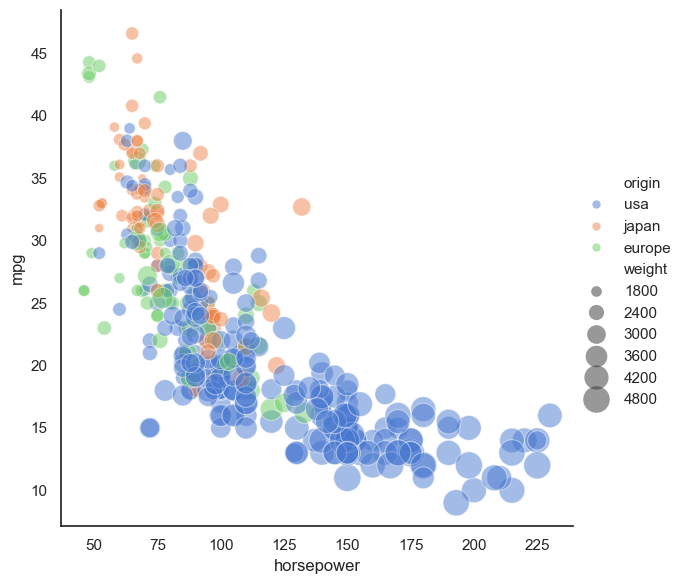

In [10]:
# Create relational plot(most commonly scatter plots)
sns.relplot(data=mpg,
            x="horsepower",
            y="mpg",
            hue="origin", # Colors based on the car's origin (e.g., USA, Europe, Japan), visually distinguish between different categories
            size="weight", # Size of the points based on cars' weight
            sizes=(40, 400),
            alpha=.5, # set the transparency of the points to 50%, making overlapping points easier to see.
            palette="muted", # use color palette "muted"
            height=6, # Control plot height
            )

📖 Documentation: [Seaborn - Scatter Bubbles Plot](https://seaborn.pydata.org/examples/scatter_bubbles.html)

📖 Documentation: [Seaborn - Marginal Ticks](https://seaborn.pydata.org/examples/marginal_ticks.html)

🥊 Challenge: ⭐ Visualizing the Planet Discovery: Orbital Period and Distance 📡

💡 Tip: The Planets dataset

The Planets dataset includes information about exoplanets, such as their orbital periods and masses. It includes features such as method of detecting the exoplanet, number of planets in the system, orbital period, mass of the planet, and distance from Earth.

`method`: Method of detecting the exoplanet (categorical)

`number`: Number of planets in the system (numerical)

`orbital_period`: Orbital period in Earth days (numerical)

`mass`: Mass of the planet in Jupiter masses (numerical)

`distance`: Distance from Earth in light-years (numerical)

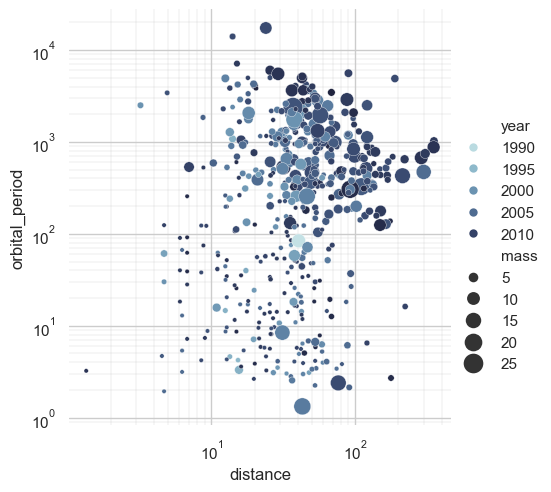

In [12]:
# set plot theme
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# defines a color palette with cubehelix_palette function
# as_cmap=True ensures the palette is treated as a continuous colormap
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Create relational plot(most commonly scatter plots)
g = sns.relplot(
    data=planets,
    x="distance",
    y="orbital_period",
    hue="year",
    size="mass",
    palette=cmap,
    sizes=(10, 200), # Size range for the points(smallest points have a size of 10, and the largest have a size of 200)
)

# sets both the x-axis and y-axis to a logarithmic scale
# often useful when dealing with data that spans a wide range of values
g.set(xscale="log", yscale="log")

# add minor gridlines to the x-axis and y-axis
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

# Remove the spines (the lines that form the border of the plot) on the left and bottom sides for a cleaner look
# try to comment it and see comparison!
g.despine(left=True, bottom=True)


📖 Documentation: [Seaborn - Scatterplot Size](https://seaborn.pydata.org/examples/scatterplot_sizes.html)

#### Histograms



📖 Documentation: [Seaborn - Visualizing Distribution](https://seaborn.pydata.org/tutorial/distributions.html)

🥊 Challenge: Visualize the Distribution of Diamond Prices with Stacked histogram 💠

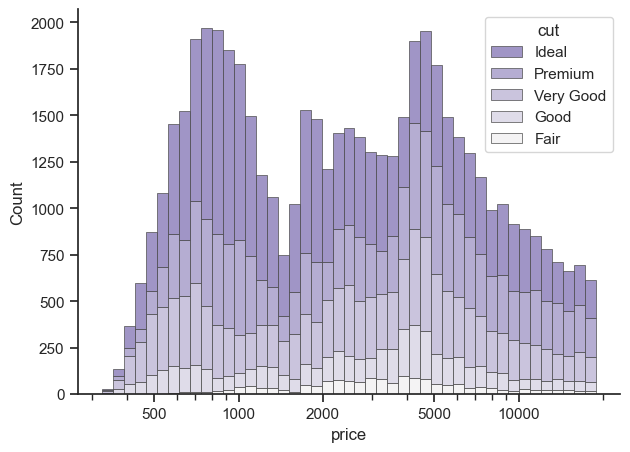

In [30]:
import matplotlib as mpl
# set plot theme
sns.set_theme(style="ticks")

# Load the Dataset
diamonds = sns.load_dataset("diamonds")

# Create a matplotlib figure (f) and an axes object (ax)
# set the dimensions of the figure to 7 inches wide and 5 inches tall.
f, ax = plt.subplots(figsize=(7, 5))
# Remove the top and right spines (borders) of the plot for a cleaner look.
sns.despine(f)

# create the histogram
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True, # Apply a logarithmic scale to the x-axis, which is useful for visualizing data with a wide range of values.
)

# Set the formatting of the x-axis tick labels to use a standard scalar format (e.g., 1000 instead of 1e3).
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# Specify the exact locations of the tick marks on the x-axis.
ax.set_xticks([500, 1000, 2000, 5000, 10000])

📖 Documentation: [Seaborn - Stack Histogram](https://seaborn.pydata.org/examples/histogram_stacked.html)

## 2. Spatial Visualization

**Vector Data:**

Formats: Shapefiles (.shp), GeoJSON (.geojson), KML (.kml).

Libraries: Geopandas, Folium, Kepler.gl.

**Raster Data (e.g., satellite imagery, heatmaps):**

Formats: GeoTIFF, PNG with georeferencing.

Libraries: Rasterio, Matplotlib.


💡 Tip: Use GeoJSON files for interactive mapping in Folium.


📖 Documentation:

Matplotlib and Basemap Toolkit: Useful for basic static maps.

[Folium: Great for creating interactive Leaflet maps](https://python-visualization.github.io/folium/latest/)

[Pandas](https://pandas.pydata.org/docs/)

[PandasAI: a Python library that makes it easy to ask questions to your data in natural language](https://docs.pandas-ai.com/intro)

[GeoPandas: Extends Pandas to handle spatial data, making working with geospatial data easier](https://geopandas.org/en/stable/index.html)

[PyDeck: High-scale spatial rendering in Python](https://plotly.com/python/)

[Kepler.gl: Open source geospatial analysis tool for large-scale data sets.](https://kepler.gl/)

[Raster.io](https://rasterio.readthedocs.io/en/stable/)

[Plotly](https://plotly.com/python/): Offers interactive and high-quality visualizations.

[Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html): Ideal for creating interactive, web-ready visualizations.


Choropleth Maps:
Highlight spatial patterns (e.g., population density, crime rates).
Tools: Folium, Geopandas, Plotly.

Heatmaps:
Show density or intensity in a spatial context (e.g., traffic congestion, Wi-Fi hotspots).
Tools: Folium, Kepler.gl.




### Global earthquake point locations


🥊 Challenge: Visualizing Earthquakes with Interactive Point Map 🗺

In [33]:
import pandas as pd

In [34]:
# Import data from USGS
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
data = data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map using the px.scatter_geo function from plotly.express
fig = px.scatter_geo(data,
                     lat='latitude',
                     lon='longitude',
                     color='mag', # colors the points on the map based on earthquake magnitude
                     hover_name='place', #  displays the name of the location when you hover over a point on the map
                     title='Earthquakes Around the World')

fig.show()


📖 Documentation: [Ploty Map](https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide
)

### American Flight Map


🥊 Challenge: Visualizing American Flights with Interactive Lines Map 🗺

In [35]:
import plotly.graph_objects as go
import pandas as pd

# load data: US airports' information
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [36]:
# flight paths including start and end locations and counts of flights on each route
df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt
0,32.895951,-97.037200,35.040222,-106.609194,AA,DFW,ABQ,444
1,41.979595,-87.904464,30.194533,-97.669872,AA,ORD,AUS,166
2,32.895951,-97.037200,41.938874,-72.683228,AA,DFW,BDL,162
3,18.439417,-66.001833,41.938874,-72.683228,AA,SJU,BDL,56
4,32.895951,-97.037200,33.562943,-86.753550,AA,DFW,BHM,168


In [37]:
# create a new plotly figure object with go.Figure()
# this figure will serve as the container for the map and all its elements
fig = go.Figure()

# add airport markers to map
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text', # show airplane name when hovering
    text = df_airports['airport'],
    mode = 'markers', # trace should be displayed as markers
    marker = dict( # customize markers appearance, setting size, color, and line properties
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

# add flight paths to map
flight_paths = []
# iterate through the df_flight_paths DataFrame,
# adding a go.Scattergeo trace for each flight path
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines', # specify that the trace should be displayed as lines
            line = dict(width = 1,color = 'red'),
            # set opacity based on flight count for each path, more frequent routes appearing darker
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

# customize overall map appearance(title, legend visibility, and geographical settings)
fig.update_layout(
    title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

# to save the interactive map as html, uncomment the line below
# fig.write_html("flight_paths.html")


### US unemplotment rate



🥊 Challenge: Visualizing US unemployment rate with Interactive Choropleth Map 🗺


🔧 Requests Installation: [Getting Started with requests in Python](https://pypi.org/project/requests/)

🔧 Folium Installation: [Getting Started with requests in Python](https://pypi.org/project/folium/)

In [3]:
import requests # make HTTP requests (like fetching data from websites)

# get state boundaries
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# getting unemployment data
state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

# preview unemployment data
state_data.head(10)


,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [12]:
import json
# preview state_geo json

# Convert the GeoJSON data to a string
state_geo_str = json.dumps(state_geo)

# Print the first 1000 characters of the string
state_geo_str[:1000]


'{"type": "FeatureCollection", "features": [{"type": "Feature", "id": "AL", "properties": {"name": "Alabama"}, "geometry": {"type": "Polygon", "coordinates": [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {"type": "Feature", 

In [ ]:
import folium

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo, # geographical boundaries of US states
    name="choropleth", # layer name
    data=state_data, # unemployment data
    columns=["State", "Unemployment"], # specif columns in `state_data` containing the state names and unemployment rates.
    key_on="feature.id", # connect geographical features and unemployment data
    fill_color="BuPu", # color palette for shading the states
    fill_opacity=0.7, # transparency of the colored areas (70% opaque)
    line_opacity=0.2, # transparency of the state boundaries (20% opaque)
    legend_name="Unemployment Rate (%)", # sets title of the map's legend

).add_to(m)

folium.LayerControl().add_to(m)

m

📖 Documentation: [Folium - Getting Started](https://python-visualization.github.io/folium/latest/getting_started.html)


🥊 Challenge: Visualizing Population in Galicia (a Community in Spain) with Interactive Heat Map 🗺

In [ ]:

# Data with latitude/longitude and values
df = pd.read_csv('https://raw.githubusercontent.com/R-CoderDotCom/data/main/sample_datasets/population_galicia.csv')

df.head()


In [ ]:
# how the df is calculated to a spatial heatmap:
# Each data point (`latitude` `longitude`) is treated as the center of a small "kernel"
# population value (z, `tot_pop`) is the "weight" of each kernel.
# KDE algorithm calculates the density of overlapping kernels at every pixel on the map

# create a heatmap
fig = px.density_mapbox(df,
                        lat = 'latitude',
                        lon = 'longitude',
                        z = 'tot_pob', # use population to determine the heatmap intensity
                        radius = 8, # control the size of the circles used to represent population density (larger radius means smoother but less detailed heatmap)
                        center = dict(lat = 42.83, lon = -8.35), # initial center of the map
                        zoom = 6, # initial zoom level of the map
                        mapbox_style = 'carto-positron',
                        color_continuous_scale='armyrose' # color scheme
                        )

fig.show()

In [ ]:
# dark mode plot

fig = px.density_mapbox(df, lat = 'latitude', lon = 'longitude', z = 'tot_pob',
                        radius = 8,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'carto-darkmatter',
                        color_continuous_scale = 'plotly3',
                        opacity=0.9)
fig.show()




📖 Documentation: [Folium Heatmap](https://wellsr.com/python/plotting-geographical-heatmaps-with-python-folium-module/)

📖 Documentation: [Plotly Spatial Heatmap](https://python-charts.com/spatial/spatial-heatmap-plotly/)


Topographic map: A Hillshade From a Digital Elevation Model Using EarthPy


In [ ]:


# Download the data needed for this vignette
data = et.data.get_data("vignette-elevation")



# Set the home directory and get the data for the exercise
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
dtm = "data/vignette-elevation/pre_DTM.tif"

# Open the DEM with Rasterio
with rio.open(dtm) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

In [ ]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(10, 6),
)
plt.show()

In [ ]:
# Adjust the azimuth value
hillshade_angle_10 = es.hillshade(elevation, altitude=10)

# Plot the hillshade layer with the modified angle altitude
ep.plot_bands(
    hillshade_angle_10,
    cbar=False,
    title="Hillshade with Angle Altitude set to 10 Degrees",
    figsize=(10, 6),
)
plt.show()

In [ ]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5

fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()



📖 Documentation:
[EarthPy - DEM Hillshade](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html#sphx-glr-gallery-vignettes-plot-dem-hillshade-py)

📖 Documentation: [12 Methods for Visualizing Geospatial Data on a Map](https://www.safegraph.com/guides/visualizing-geospatial-data)

🥊 Challenge: Visualizing Population in Each Country over Time

In [ ]:
# load data
df = px.data.gapminder()

# let's take a look at df!
df.head(20)

In [ ]:
df.info()

In [ ]:


fig = px.scatter_geo(df,
                     locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     size="pop",
                     animation_frame="year",
                     projection="natural earth"
                     )

fig.show()

📖 Documentation: [Plotly - Bubble Maps](https://plotly.com/python/bubble-maps/)


## 3. Temporal Data Visualization

Time-series visualizations using Matplotlib and Plotly.

🔔 Question: How can temporal trends in weather help city planners?

💡 Tip: Use Plotly for interactive and zoomable time-series charts.

📖 Documentation: [Plotly](https://plotly.com/python/)

Data Types and Formats
**Time-Series Data:**
Formats: CSV, JSON, or database tables.
Structure: A timestamp column with associated values value

Traffic and Public Transit Data:

Formats: CSV or JSON with `timestamp`, `location_id`, and `value` fields.

Weather Data:

Formats: API outputs in JSON (e.g., hourly temperature, air quality).


🥊 Challenge: Getting Started with Time Series Line Chart



In [ ]:

sns.set_theme(style="whitegrid")

# Generating Random Data
rs = np.random.RandomState(365)

# Generate 365 rows and 4 columns of random numbers,
# then calculate the cumulative sum along the rows (axis=0) to create a time series pattern
values = rs.randn(365, 4).cumsum(axis=0)

# Create one year's range starting from January 1, 2024
dates = pd.date_range("1 1 2024",
                      periods=365,
                      freq="D" # with a daily frequency ("D")
                      )

data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

# Smoothing the Data
# Apply a rolling average with a window of 7 days to the data DataFrame
data = data.rolling(7).mean()

# Creating the Line Chart
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

🥊 Challenge: 🌞 Visualizing Vancouver's Temperature Trend in 2024 🌨 🥶

💡 Tip: The Meteostat Data Source and Python Library

Meteostat is a weather and climate database providing detailed weather data for thousands of weather stations and places worldwide.

The Meteostat Python library provides simple access to open weather and climate data using Pandas.

Historical observations and statistics are obtained from Meteostat's bulk data interface and consist of data provided by different public interfaces, most of which are governmental.


In [ ]:


# Set time period
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2024
data = Daily(location, start, end)
data = data.fetch()

In [ ]:
data.head()

In [ ]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

📖 Documentation: [Seaborn - Time Series](https://seaborn.pydata.org/examples/timeseries_facets.html)

📖 Documentation: [Seaborn - Wide Data Lineplot](https://seaborn.pydata.org/examples/wide_data_lineplot.html)

📖 Documentation: [Reference: Plotly](https://plotly.com/python/time-series/)


#### Interactive Temproal Visualzation: Mixtures of Period data, Range Slider, Range Selector Buttons, Zoom Level[link text](https://)

🥊 Challenge: 🌞 Interactively Visualizing Delhi's Temperature Change
 🌨 🥶

In [ ]:
# load data
data = pd.read_csv("https://raw.githubusercontent.com/taraliu23/Urban-Data-Science/refs/heads/main/data/DailyDelhiClimateTrain.csv")

# convert the values in "date" column from text strings to datetime objects
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')

# creates a new column "year"
# then extracts the year from the "date" column(datetime objects) using .dt.year
data["year"] = data["date"].dt.year

# creates a new column "month"
# then extracts the month from the "date" column(datetime objects) using .dt.month
data["month"] = data["date"].dt.month

# display the first five rows of the data
print(data.head())

In [ ]:
sns.set_theme(
    style="white", # chooses a white background for the plot
    context="notebook" # optimizes the display appearance  within a Jupyter notebook
              )

# set customize plot style
plt.style.use('fivethirtyeight')

plt.title("Temperature Change in Delhi Over the Years")

# creates the line chart
sns.lineplot(data = data,
             x='month',
             y='meantemp',
             hue='year' # use 'year' column to create separate lines for different years, each distinguished by color
             )

plt.show()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)


🥊 Challenge: 🌞 Forecasting Delhi's Temperature and Visualizing Interactively
 🌨 🥶

In [ ]:
# # Prophet library is a time series forecasting tool developed by Meta
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly

# initialize a new Prophet model with default settings
model = Prophet()

# the Prophet model is trained using historical temperature data stored in the forecast_data DataFrame
# This DataFrame needs to have two columns: 'ds' (datestamp) and 'y' (the values to be forecasted - in our case, temperature).
model.fit(forecast_data)

# generates a DataFrame containing future dates for the forecast
# periods=365 means that the forecast will extend 365 days into the future
forecasts = model.make_future_dataframe(periods=365)
# results are stored in the predictions DataFrame
predictions = model.predict(forecasts)

# reate an interactive Plotly visualization of the forecast
plot_plotly(model, predictions)


📖 Documentation: [Weather Forecasting Using Python](https://thecleverprogrammer.com/2022/10/17/weather-forecasting-using-python/)

🥊 Challenge: 🌐 Visualizing Connections between Countries 🌎 🌏 🌍

In [ ]:

df = px.data.gapminder().query("year == 2007")

df.head(10)

In [ ]:




fig = px.line_geo(df, locations="iso_alpha",
                  color="continent", # "continent" is one of the columns of gapminder
                  projection="orthographic")

fig.show()



📖 Documentation: [Plotly - Lines on Maps](https://plotly.com/python/lines-on-maps/)



🥊 Challenge: Creating 3D Map of Vancouver

In [ ]:

DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
LAND_COVER = [[[-123.0, 49.196], [-123.0, 49.324], [-123.306, 49.324], [-123.306, 49.196]]]

# initial view of the 3D map
INITIAL_VIEW_STATE = pydeck.ViewState(
  latitude=49.254,
  longitude=-123.13,
  zoom=11,
  max_zoom=16,
  pitch=45, # set the viewing angle (tilt) of the map
  bearing=0 # set the rotation of the map
)

polygon = pydeck.Layer(
    'PolygonLayer',
    LAND_COVER,
    stroked=False, # outlines of the blocks won't be drawn
    # processes the data as a flat longitude-latitude pair
    get_polygon='-',
    get_fill_color=[0, 0, 0, 20]
)

geojson = pydeck.Layer(
    'GeoJsonLayer',
    DATA_URL,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation='properties.valuePerSqm / 20',
    get_fill_color='[255, 255, properties.growth * 255]',
    get_line_color=[255, 255, 255],
    pickable=True
)

r = pydeck.Deck(
    layers=[polygon, geojson],
    initial_view_state=INITIAL_VIEW_STATE)

# gnerate the HTML code for the visualization
r.to_html()


📖 Documentation: [Deck.gl](https://deckgl.readthedocs.io/en/latest/layer.html)

🥊 Challenge: Creating Maps with Cartographic Elements - Georgia Area Choropleth Map

Firstly, download `Georgia_Counties.geojson` file from [here](https://hub.arcgis.com/datasets/SAGIS::georgia-counties/about).

Then, drag your `Georgia_Counties.geojson` to the Files folder on the left.

In [ ]:
Image()

In [ ]:

gdf = gpd.read_file('/content/Georgia_Counties.geojson')

#### Create a Map using EOMaps

Initialize a map with a CRS.

Reference: [`eomaps.Maps()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#eomaps.eomaps.Maps)

In [ ]:

m = Maps(crs=Maps.CRS.Orthographic(-85, 35), figsize=(7, 8))


In [ ]:
# Set the map extent
xmin, ymin, xmax, ymax = gdf.total_bounds
buffer = 1.5
m.set_extent([xmin-buffer, xmax+buffer, ymin-buffer, ymax+buffer])


Add the gridlines.

Reference: [`eomaps.Maps.add_gridlines()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_gridlines.html)


In [ ]:
g = m.add_gridlines(1, lw=0.25, alpha=0.5, zorder=0)
gl = g.add_labels(fontsize=8, every = 2)
m.show()

Add North Arrow.

Reference: [`eomaps.Maps.add_compass()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_compass.html#eomaps.eomaps.Maps.add_compass)

In [ ]:
c = m.add_compass(style='compass', pos=(0.85, 0.9))


m.show()

Add scalebar.

Reference: [`eomaps.Maps.add_scalebar()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_scalebar.html)

In [ ]:
s = m.add_scalebar(
    n=4,
    scale=50000,
    auto_position=(0.1,0.1),
    preset='bw',
    rotation=90,
    label_props={'rotation':90, 'offset':1.5, 'weight':0.5},
    scale_props={'colors': ('k','#bdbdbd','k','#bdbdbd','k')},
    line_props={'lw':0, 'ls': 'solid'}
)
m.show()


In [ ]:
bins = np.linspace(gdf["Acres"].min(), gdf["Acres"].max(), 6)

# plot GeoDataFrame
m.add_gdf(gdf,
          column='Sq_Miles',
          cmap='BuPu',
            linewidth=0.5,
          legend=True
)


m.add_title('Georgia Counties Areas (2022)', y=0.97)


m.show()

In [ ]:
# Save the map
output_folder = 'output'
output_path = os.path.join(output_folder, 'map.png')
m.savefig(output_path, dpi=300)

📖 Documentation:[Spatial Thoughts - Python DataViz](https://courses.spatialthoughts.com/python-dataviz.html)

📖 Documentation: [Supplement Cartographic Elements](https://colab.research.google.com/github/spatialthoughts/python-dataviz-web/blob/main/supplement_cartographic_elements.ipynb#scrollTo=e59f2b5d-e9d5-4a62-91ef-d583118e6b36)